# **Herramientas de Análisis**

---
---

<!-- script html for image -->

<center>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Sw-ep1-logo.svg/1280px-Sw-ep1-logo.svg.png"  width="500" height="150"/>


<br>

Fuente de la imagen: [https://es.wikipedia.org](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_I_-_La_amenaza_fantasma)

</center>

<br>


# **Índice**

---
---

> [Herramientas de análisis](#scrollTo=LPS3L_htTi-b)
<br>
>>
>>
>> [1 - Programación en Python](#scrollTo=7ygQyWdBTi-t&line=1&uniqifier=1) \\
>>
>>> [1.1. Introducción](#scrollTo=MR_aVrMXTi-v&line=1&uniqifier=1) \\
>>>
>>> [1.2. Actividad Guiada](#scrollTo=5RABe72nTi_C&line=1&uniqifier=1) 



# 1 - Programación en Python

Tal y como se indica en la propia página de ***Colaboratory***, o más comunmente conocido como ***Colab***, te permite ejecutar y programar en Python en tu navegador.

Para trabajar con Python en Colab hay que realizar 3 sencillos pasos:

1. Abre Colab con la siguiente ruta:
[https://colab.research.google.com/notebooks/intro.ipynb](https://colab.research.google.com/notebooks/intro.ipynb)

2. Inicia sesión con una cuenta de Google y ¡listo!

3. Por último, hay que preparar el entorno ejecutando el siguiente código:

In [ ]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/mbdds_fc20.git /content/mbdds_fc20
    !git -C /content/mbdds_fc20 pull
    %cd /content/mbdds_fc20/Python
    !python -m pip install -r requirementsColab.txt

Cloning into '/content/mbdds_fc20'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 724 (delta 8), reused 12 (delta 3), pack-reused 705
Receiving objects: 100% (724/724), 12.21 MiB | 12.96 MiB/s, done.
Resolving deltas: 100% (497/497), done.
Already up to date.
/content/mbdds_fc20/Python
     |████████████████████████████████| 358kB 9.2MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 3.5MB 20.7MB/s 
     |████████████████████████████████| 194kB 42.5MB/s 
     |████████████████████████████████| 1.0MB 43.6MB/s 
     |████████████████████████████████| 1.8MB 46.0MB/s 
     |████████████████████████████████| 20.9MB 3.6MB/s 
     |████████████████████████████████| 870kB 52.0MB/s 
     |████████████████████████████████| 481kB 45.2MB/s 
     |████████████████████████████████| 686kB 41.9MB/s 
     |████████████████████████████████| 911kB 43.5MB

## 1.1 Introducción

Python es una herramienta para la programación de propósito general. 

En los últimos años, se ha convertido en uno de los lenguajes de referencia para el *Data Science*. El motivo es que ha sabido rodearse de un gran ecosistema como [SciPy](https://www.scipy.org/) con librerías (numpy, pandas, scipy...) y herramientas (Jupyter, Spyder,...) orientadas al análisis y a la programación matemática.

Los desarrolladores de Python buscan hacer un lenguaje vivo y atractivo para el programador. Prueba de ello es que su nombre es un tributo a la compañia de humor británica *Monthy Python*.

El núcleo de su filosofía de programación se resume en el "*Zen de Python*" formado por 20 aforismos escritos por Tim Peters, 19 de los cuales se pueden leer más abajo importando `this`. El veinte, dijo Tim Peters que lo diría el creador de Python, Guido van Rossum, pero parece que aún no se ha pronunciado. 

In [ ]:
import this

Ser *Pythoniano* o *Pythónico* significa utilizar correctamente el código, es decir, programar con un lenguaje simple y fácil de leer.

## 1.2 Actividad Guiada

La actividad guiada, que te proponemos, en consonancia con los Pythonianos, es que te diviertas analizando datos relacionados con la saga de Star Wars: Planetas, Naves, Vehículos, Personajes y Especies.

Para ello, contamos con los datos de [SWAPI](https://swapi.dev/), acrónimo de STAR WARS API, que nos da acceso libre a una colección de datos de la saga.

Estos datos se han descargado y preparado expresamente para este curso. Puedes encontrar el código utilizado en el ***Anexo: README de Python***, capítulo "IMPORTAR DATOS DE STARWARS SWAPI".

Para cargar los datos y visualizar su contenido:

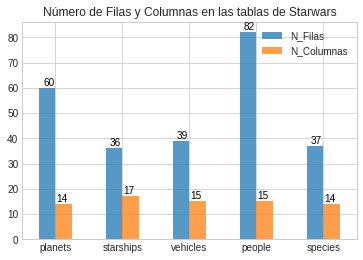

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
plt.style.use('seaborn-whitegrid')

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}
entidades_count = {k: v.shape for k,v in entidades_df.items()}
entidades_count_df = pd.DataFrame.from_dict(entidades_count, orient='index', columns=['N_Filas', "N_Columnas"])

g = entidades_count_df.plot.bar(alpha=0.75, rot=0)
plt.title("Número de Filas y Columnas en las tablas de Starwars")
#g.title = 'Entidad de Starwars'
for i, (k, row) in enumerate(entidades_count_df.iterrows()):
    g.text(i-0.1, row['N_Filas']+1, row['N_Filas'], color='black', ha="center")
    g.text(i+0.1, row['N_Columnas']+1, row['N_Columnas'], color='black', ha="center")


Vemos que los datos están formados por 5 conjuntos. Por ejemplo, `people` contiene 82 personajes descritos mediante 16 variables.

Una muestra de los datos de los personajes es la siguiente:

In [ ]:
entidades_df['people'].head()

,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
name,,,,,,,,,,,,,,,
Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,http://swapi.dev/api/planets/1/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[],"[http://swapi.dev/api/vehicles/14/, http://swa...","[http://swapi.dev/api/starships/12/, http://sw...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,http://swapi.dev/api/people/1/
C-3PO,167.0,75.0,n/a,gold,yellow,112.0,none,http://swapi.dev/api/planets/1/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[http://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,http://swapi.dev/api/people/2/
R2-D2,96.0,32.0,n/a,"white, blue",red,33.0,none,http://swapi.dev/api/planets/8/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[http://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,http://swapi.dev/api/people/3/
Darth Vader,202.0,136.0,none,white,yellow,41.9,male,http://swapi.dev/api/planets/1/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[],[],[http://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,http://swapi.dev/api/people/4/
Leia Organa,150.0,49.0,brown,light,brown,19.0,female,http://swapi.dev/api/planets/2/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[],[http://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,http://swapi.dev/api/people/5/


Observa que hay variables numéricas como la altura, el peso o la edad (en años ABY Antes de la Batalla de Yavin). Otras son categóricas, como el género del personaje. Incluso encontramos variables en formato de lista, como las películas en las que salió el personaje y los vehículos y naves que condujo.

```
"Yoda habló de otra." 
"La otra de quién habló es tu hermana gemela.» 
― Luke Skywalker y Obi-Wan Kenobi
```

> ¿Te acordabas de que Luke y Leia eran gemelos? ¿Sabías que su padre, Anakin (posteriormente Darth Vader), tenía 22 años cuando los tuvo?

Podrás analizar todo esto y mucho más, en los datos y así convertirte en el auténtico Jedi que sabemos que llevas dentro.

Consulta la [Documentación de SWAPI](https://swapi.dev/documentation) sobre sus tablas y campos.

*Y que la fuerza te acompañe...*